In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
np.random.seed(1111111)

N = 10**5
lambda_y = 4
p = 0.8

### Implementing a poisson thinning process

Y is a random variable with lambda=4

Z is defined as binomial of Y with probability of success p.

In [2]:
Y = np.random.poisson(lambda_y, N)

Z = np.random.binomial(Y,p)

# Empirical Estimation of $P(\hat{Z})$ 

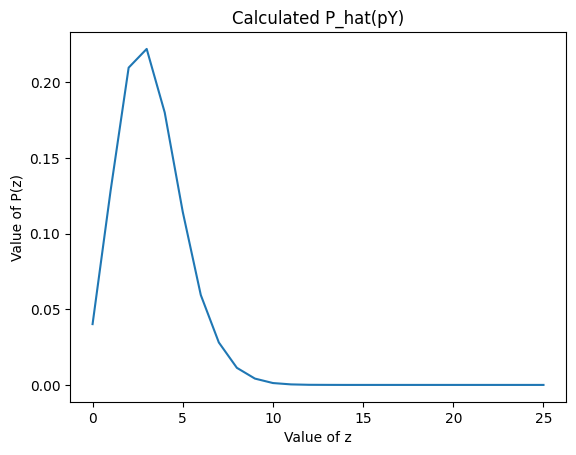

In [4]:
name = "Calculated P_hat(pY)"

x_axis = [i for i in range(26)]
y_axis = []

for i in x_axis:
    y_axis.append(len(Z[(Z==i)]) / N)               # frequency of i in Z

plt.plot(x_axis, y_axis)
plt.xlabel("Value of z")
plt.ylabel("Value of P(z)")
plt.title(name)
plt.savefig(f'../results/q2b/{name}.svg')
plt.show()

### Analytical Expression for $P(Z)$

$$P(Z=k) = \frac{e^{-\lambda_Z} \cdot \lambda_Z^k}{k!}$$

Where $\lambda_Z = p \lambda_Y$

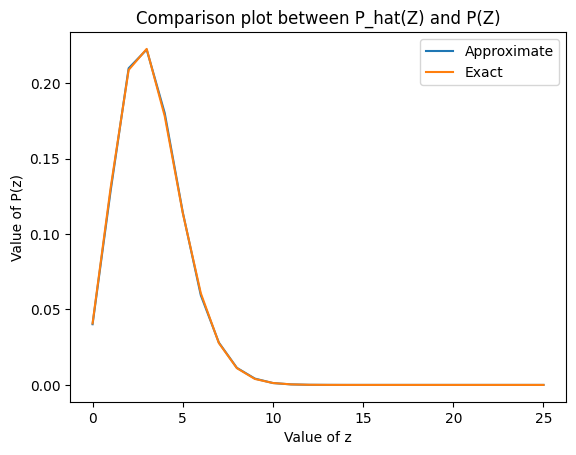

Error between approximate and exact probabilities:
For k = 0: Calculated P_hat(Z): 0.04021 and Calculated P(Z): 0.04076220397836621, and the error is 0.0005522039783662086
For k = 1: Calculated P_hat(Z): 0.12849 and Calculated P(Z): 0.1304390527307719, and the error is 0.0019490527307718941
For k = 2: Calculated P_hat(Z): 0.2098 and Calculated P(Z): 0.20870248436923505, and the error is 0.0010975156307649336
For k = 3: Calculated P_hat(Z): 0.22219 and Calculated P(Z): 0.22261598332718405, and the error is 0.0004259833271840485
For k = 4: Calculated P_hat(Z): 0.18014 and Calculated P(Z): 0.17809278666174724, and the error is 0.0020472133382527513
For k = 5: Calculated P_hat(Z): 0.11443 and Calculated P(Z): 0.11397938346351824, and the error is 0.0004506165364817627
For k = 6: Calculated P_hat(Z): 0.05946 and Calculated P(Z): 0.0607890045138764, and the error is 0.0013290045138764014
For k = 7: Calculated P_hat(Z): 0.02808 and Calculated P(Z): 0.027789259206343498, and the error is 0.000

In [5]:
poisson_value = lambda k, l: np.exp(-l)*l**k/math.factorial(k)        # defining PDF
p_z = [poisson_value(i, p*lambda_y) for i in x_axis]

name = "Comparison plot between P_hat(Z) and P(Z)"
plt.plot(x_axis, y_axis, label='Approximate')
plt.plot(x_axis, p_z, label='Exact')
plt.legend()
plt.xlabel("Value of z")
plt.ylabel("Value of P(z)")
plt.title(name)
plt.savefig(f'../results/q2b/{name}.svg')
plt.show()

print( "Error between approximate and exact probabilities:")
for i in x_axis:
     print(f"For k = {i}: Calculated P_hat(Z): {y_axis[i]} and Calculated P(Z): {p_z[i]}, and the error is {abs(y_axis[i] - p_z[i])}")
